In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

# 7. Web Scraping

Web  scraping  is  the  practice  of  gathering  data  through  any  means  otherthan a program interacting with an API (or, obviously, through a human using a webbrowser).  This  is  most  commonly  accomplished  by  writing  an  automated  programthat queries a web server, requests data (usually in the form of the HTML and otherfiles  that  comprise  web  pages),  and  then  parses  that  data  to  extract  needed  information.

# 7.1 Selenium
Selenium automates browsers. That's it! <br>
Selenium is a Python library and tool used for automating web browsers to do a number of tasks. One of such is web-scraping to extract useful data and information that may be otherwise unavailable. <br>
**For this course, we use Chrome.**

## 7.1 Installing Libraries
We need to install these two libraries

In [26]:
 !pip install selenium
!pip install webdriver-manager

In [2]:
# this library is to manipulate browser
from selenium import webdriver

# it allows you to work with differen versions of drivers
# We call ChromeDriver
from webdriver_manager.chrome import ChromeDriverManager
import re
import time 

## 7.3 Launch/Set the Driver
This code opens a Chrome Driver. We are going to use it to go navigate on the web.

In [11]:
pwd

'C:\\Users\\Usuario\\Documents\\GitHub\\Diplomado_PUCP\\Lecture_7'

In [3]:
from selenium import webdriver #webdriver Proporciona una interfaz para interactuar con navegadores web.
from selenium.webdriver.chrome.service import Service 
service = Service(executable_path="chromedriver-win64/chromedriver.exe")
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)

service =: Aquí estás creando una variable llamada service. Esta variable almacenará la instancia de la clase Service que vas a crear. Almacenar la instancia en una variable te permite utilizarla más adelánten el código para interactuar con el servicio ChromeDriver.

Service(: Esto es una llamada al constructor de la clase Service. Un constructor en programación es un método especial que se utiliza para crear e inicializar un objeto de una clase.

executable_path="chromedriver-win64/chromedriver.exe": Aquí estás especificando el argumento executable_path en el constructor de Service. Este argumento indica la ruta al ejecutable del ChromeDriver en tu sistema. En tu caso, estás indicando que el ChromeDriver se encuentra en la carpeta chromedriver-win64 y el archivo se llama chromedriver.exe. Esta ruta debe corresponder a la ubicación real del ChromeDriver en tu sistema.

In [22]:
# # Case 1 - Download the driver

url = 'https://resultadoshistorico.onpe.gob.pe/EG2021/'
driver.get( url ) #dirigete al url 

![Chrome is controlled by automated software](Images/chrome_automated.png)

In [9]:
driver.title
print('Title:',  driver.title)

Title: Presentación de Resultados Elecciones Generales y Parlamento Andino 2021


In [51]:
# Access to the title
print('Title: ', driver.title)

Title:  Presentación de Resultados Elecciones Generales y Parlamento Andino 2021


In [5]:
# Access to the curent url 
print('Current Page URL: ', driver.current_url)

Current Page URL:  https://resultadoshistorico.onpe.gob.pe/EG2021/


In [10]:
# Make screenshot of the webpage
driver.save_screenshot('Images/resultados_presidenciales.png')

True

In [54]:
driver.current_url

'https://resultadoshistorico.onpe.gob.pe/EG2021/'

In [11]:
#if re.search(r'resultadoshistorico', driver.current_url):
  #  driver.save_screenshot('Images/resultados_presidenciales.png') #save screenshot with provided name
  #  print('Resultados Presidenciales saved!')

#else:
  #  print("Page not found")

In [12]:
#get cookie information
cookies = driver.get_cookies() 
print('Cookies obtained from resultados_presidenciales')
print(cookies) #Cookie son bloques 

Cookies obtained from resultados_presidenciales
[{'domain': 'resultadoshistorico.onpe.gob.pe', 'httpOnly': True, 'name': 'web_server_iron', 'path': '/', 'sameSite': 'Lax', 'secure': True, 'value': '!r1KCGa7cUJY0Z0au0EiGh5fRpo/FcqLfUy3VPy0acIttRWk6NqqINyED73UWLQCFxln2D6Ou3HSCWos='}, {'domain': '.onpe.gob.pe', 'expiry': 1705766804, 'httpOnly': False, 'name': '_gid', 'path': '/', 'sameSite': 'Lax', 'secure': False, 'value': 'GA1.3.1679741656.1705680405'}, {'domain': '.onpe.gob.pe', 'expiry': 1740240404, 'httpOnly': False, 'name': '_ga', 'path': '/', 'sameSite': 'Lax', 'secure': False, 'value': 'GA1.3.438989667.1705680404'}, {'domain': '.onpe.gob.pe', 'expiry': 1740240404, 'httpOnly': False, 'name': '_ga_WW5NP75D4F', 'path': '/', 'sameSite': 'Lax', 'secure': False, 'value': 'GS1.1.1705680404.1.0.1705680404.60.0.0'}]


In [18]:
# Get page source
type(driver.page_source)  #devuelve todo el codigo creado para extraer información 
    #driver.page_source obtiene el código fuente HTML de la página web actualmente cargada en el navegador.
    #type(...) es una función incorporada en Python que devuelve el tipo de un objeto. En este caso, te indica el tipo de datos que es driver.page_source
driver.page_source



'<html><head></head><body></body></html>'

In [19]:
# #EJEMPLO

url = 'https://elperuano.pe/'
driver.get( url ) #dirigete al url 

'<html lang="es-pe"><head>\n<script src="https://s0.2mdn.net/instream/video/client.js" async="" type="text/javascript"></script><script src="https://securepubads.g.doubleclick.net/pagead/managed/js/gpt/m202401110101/pubads_impl_page_level_ads.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-L4ZY3ZB36D&amp;l=dataLayer&amp;cx=c"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-MGM57LX"></script><script async="" src="//www.google-analytics.com/analytics.js"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-MTQGGW6"></script><script>\n\n\n\n</script>\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1.
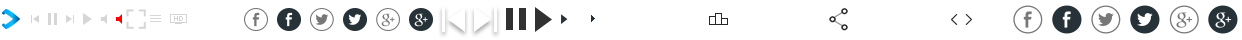
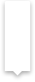
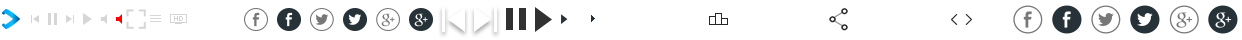

In [20]:
driver.page_source

In [21]:
# Refresh the page - 
driver.refresh() #reload or refresh the browser

In [29]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service 
    
service = Service(executable_path="chromedriver-win64/chromedriver.exe")
options =webdriver.ChromeOptions()
driver =webdriver. Chrome(service=service, options = options) 
driver.maximize_window() #maximizar la ventana del navegador web que estás controlando mediante el WebDriver de Selenium.

url_1 = "https://resultadoshistorico.onpe.gob.pe/EG2021/"
driver.get( url_1 )
time.sleep(3)

url_2 = "https://www.google.com/"
driver.get( url_2 )
time.sleep(3)

driver.back()

In [35]:
driver.close()

In [62]:
driver.quit()

![Quite and Close](Images/quite_close.png)

In [37]:
type(driver)

selenium.webdriver.chrome.webdriver.WebDriver

driver es una instancia de la clase WebDriver específicamente del subpaquete chrome.webdriver de Selenium. Esto significa que estás utilizando un WebDriver diseñado para interactuar con el navegador Google Chrome.

`driver` is an `selenium.webdriver.chrome.webdriver.WebDriver` object. This object has some attributes that will help us to navigate on the web.

Now, you can see in the driver that we are in [this link](https://www.convocatoriascas.com/).

# Extra - Best Practices before working

1. Maximize the browser

In [30]:
driver = webdriver.Chrome(executable_path=r'chromedriver-win64/chromedriver.exe')

url = 'https://www.kaspersky.com/resource-center/definitions/cookies'
driver.get( url )

driver.maximize_window()

TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

2. Set the Browser Zoom Level to 100 percent

In [28]:
driver.execute_script("document.body.style.zoom='100%'")

### 7.4.1. HTML
HTML stands for HyperText Markup Language. You can deduce that it’s a language for creating web pages. It’s not a programming language like Python or Java, but it’s a markup language. It describes the elements of a page through tags characterized by angle brackets.

1. The document always begins and ends using `<html>` and `</html>`.
2. `<body></body>` constitutes the visible part of HTML document.
3. `<h1>` to `<h3>` tags are defined for the headings.

#### 7.4.1.1. HTML Headings
HTML headings are defined with the `<h1>` to `<h6>` tags.
`<h1>` defines the most important heading. `<h6>` defines the least important heading.

We can use text cells since markdown reads html tags.

<h1>This is heading 1</h1>
<h2>This is heading 2</h2>
<h3>This is heading 3</h3>

#### 7.4.1.2. HTML Paragraphs
HTML paragraphs are defined with the `<p>` tag.
`<br>` tag is similar to `"\n"`.

<html>
<br>
<p>My first paragraph.</p> <br>
<p>This is another paragraph for this text cell.</p>
<html>

#### 7.4.1.3. HTML Links
HTML links are defined with the <a> tag:

<a href="http://bayes.cs.ucla.edu/jp_home.html">This is a link for Judea Pearl Website</a>

#### 7.4.1.3. Unordered HTML List
An unordered list starts with the `<ul>` tag. Each list item starts with the `<li>` tag.

<ul>
  <li>Coffee</li>
  <li>Tea</li>
  <li>Milk</li>
</ul>

#### 7.4.1.4. Ordered HTML List
An ordered list starts with the `<ol>` tag. Each list item starts with the `<li>` tag.

<ol>
  <li>Coffee</li>
  <li>Tea</li>
  <li>Milk</li>
</ol>

#### 7.4.1.4. HTML Tables

A table in HTML consists of table cells inside rows and columns. Each table cell is defined by a `<td>` and a `</td>` tag. Each table row starts with a `<tr>` and end with a `</tr>` tag.

<table>
  <tr>
    <th>Manager</th>
    <th>Club</th>
    <th>Nationality</th>
  </tr>
  <tr>
    <td>Mikel Arteta</td>
    <td>Arsenal</td>
    <td>Spain</td>
  </tr>
  <tr>
    <td>Thomas Tuchel</td>
    <td>Chelsea</td>
    <td>Germany</td>
  </tr>
</table>

#### 7.4.1.5. HTML Iframes

An HTML iframe is used to display a web page within a web page.


<!DOCTYPE html>
<html>
  
<head>
    <title>HTML iframe src Attribute</title>
</head>
  
<body style="text-align: center">
    <h1>Diploma</h1>
    <h2>HTML iframe</h2>
    <iframe>
          
        <!DOCTYPE html>
        <html>

        <head>
            <title>New html</title>
        </head>

        <body style="text-align: center">
            <h1>Diploma2</h1>
            <h2>HTML iframe</h2>
            <iframe>

            </iframe>
        </body>

        </html>
    </iframe>
</body>
  
</html>

#### 7.4.1.6. HTML Tags - Key

|Tag|Description|
|---|---|
|`<h1>` to `<h6>`|	Defines HTML headings|
|`<ul>`|	Defines an unordered list|
|`<ol>`|	Defines an ordered list|
|`<p>`|	Defines a paragraph|
|`<a>`|	It is termed as anchor tag and it creates a hyperlink or link.|
|`<div>`|	It defines a division or section within HTML document.|
|`<strong>`|	It is used to define important text.|
|`<table>`|	It is used to present data in tabular form or to create a table within HTML document.|
|`<td>`|	It is used to define cells of an HTML table which contains table data|
|`<iframe>`|	Defines an inline frame|

### 7.4. Identifying elements in a web page

To identify elements of a webpage, we need to inspect the webpage. Open the driver and press `Ctrl`+ `Shift` + `I`.

#### One Element
|Method|Description|
|---|---|
|find_element_by_id| Use id.|
|find_element_by_name| Use name.|
|find_element_by_xpath| Use Xpath.|
|find_element_by_tag_name| Use HTML tag.|
|find_element_by_class_name| Use class name.|
|find_element_by_css_selector| Use css selector.|

#### Multiple  elements
|Method|Description|
|---|---|
|find_elements_by_id| Use id.|
|find_elements_by_name| Use name.|
|find_elements_by_xpath| Use Xpath.|
|find_elements_by_tag_name| Use HTML tag.|
|find_elements_by_class_name| Use class name.|
|find_elements_by_css_selector| Use css selector.|

### 7.4.1. Xpath
XPath in Selenium is an XML path used for navigation through the HTML structure of the page. It is a syntax or language for finding any element on a web page using XML path expression.

The basic format of XPath in selenium is explained below with screen shot.
<img src="../_images/x_path.png">

**DO NOT COMPLICATE!**
Finding the XPath of a element:
1. Go to the element
2. Right click
3. Inspect - You may have to do it twice.
4. Go to the selected line
5. Right click
7. Copy 
8. Copy Full Xpath

In [ ]:
/html/body/onpe-root/onpe-home-onpe/div[1]/div/div/div/div[2]/div[1]/div/div/a/div[1]/img
#Cada objeto dentro de la página web tiene un full path 

**Example**

We are going to select `Economistas` option and make a click. Use `find_element_by_xpath` and click.

In [56]:
driver = webdriver.Chrome(executable_path=r'chromedriver-win64/chromedriver.exe')
driver.maximize_window()

url_1 = "https://resultadoshistorico.onpe.gob.pe/EG2021/"
driver.get( url_1 )
#time.sleep(3)

TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

In [33]:
from selenium.webdriver.common.by import By

In [34]:
resumen_general = driver.find_element(By.XPATH, '/html/body/onpe-root/onpe-home-onpe/div[1]/div/div/div/div[2]/div[1]/div/div/a/div[2]/div')
resumen_general.click()

In [ ]:
#mapdiv > div > div.amcharts-chart-div > svg > g:nth-child(8) > g > g:nth-child(1) > path:nth-child(36)

In [35]:
 driver.find_element(By.XPATH,'/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[2]/ul/li[1]/a')
 

<selenium.webdriver.remote.webelement.WebElement (session="2ed23f5d2ef0b23ed0178e1ef76a01c5", element="E8F3D4811399CE63383040456953B07C_element_52")>

In [37]:
 driver.find_element(By.XPATH,'/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[1]/select/option[2]').click
#Me va a seleccionar PERÚ 



<bound method WebElement.click of <selenium.webdriver.remote.webelement.WebElement (session="2ed23f5d2ef0b23ed0178e1ef76a01c5", element="E8F3D4811399CE63383040456953B07C_element_3508")>>

In [ ]:
AHORA QUIERO MI TABLA DE VOTOS: 

*Encontrar elemento a partir de tipo de ID*

In [46]:
table_path = driver.find_element(By.XPATH,'/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[4]/div[1]/div[3]')

In [55]:
table_html = table_path.get_attribute('innerHTML')
#table_html

In [ ]:
import pandas as pd

In [63]:
table = pd.read_html(table_html)
table[0]

,TOTAL DE VOTOS,TOTAL DE VOTOS.1,TOTAL DE VOTOS.2,TOTAL DE VOTOS.3,TOTAL DE VOTOS.4,TOTAL DE VOTOS.5
0,ORGANIZACIONES POLÍTICAS,ORGANIZACIONES POLÍTICAS,ORGANIZACIONES POLÍTICAS,TOTAL,%VÁLIDOS,%EMITIDOS
1,NaN,NaN,PARTIDO NACIONALISTA PERUANO,228955,1.608%,1.309%
2,NaN,NaN,"EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",64217,0.451%,0.367%
3,NaN,NaN,PARTIDO MORADO,319176,2.242%,1.825%
4,NaN,NaN,PERU PATRIA SEGURA,54341,0.382%,0.311%
5,NaN,NaN,VICTORIA NACIONAL,802957,5.639%,4.592%
6,NaN,NaN,ACCION POPULAR,1294681,9.092%,7.404%
7,NaN,NaN,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,1652682,11.607%,9.452%
8,NaN,NaN,PODEMOS PERU,808559,5.678%,4.624%
9,NaN,NaN,JUNTOS POR EL PERU,1111407,7.805%,6.356%


In [7]:
service = Service(executable_path="chromedriver-win64/chromedriver.exe")
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)
driver.maximize_window()

driver.get( "https://www.legacy.com/obituaries/search")
name = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[2]/div[2]/div/input[1]')
name.send_keys("Brown")


WebDriverException: Message: unknown error: cannot determine loading status
from target frame detached
  (Session info: chrome=120.0.6099.225)
Stacktrace:
	GetHandleVerifier [0x00007FF6E7B72142+3514994]
	(No symbol) [0x00007FF6E7790CE2]
	(No symbol) [0x00007FF6E76374C3]
	(No symbol) [0x00007FF6E762062C]
	(No symbol) [0x00007FF6E761EE3D]
	(No symbol) [0x00007FF6E761F7CE]
	(No symbol) [0x00007FF6E762DC02]
	(No symbol) [0x00007FF6E7644471]
	(No symbol) [0x00007FF6E764937A]
	(No symbol) [0x00007FF6E761FEC6]
	(No symbol) [0x00007FF6E76440AD]
	(No symbol) [0x00007FF6E76C2AEF]
	(No symbol) [0x00007FF6E76A5D93]
	(No symbol) [0x00007FF6E7674BDC]
	(No symbol) [0x00007FF6E7675C64]
	GetHandleVerifier [0x00007FF6E7B9E16B+3695259]
	GetHandleVerifier [0x00007FF6E7BF6737+4057191]
	GetHandleVerifier [0x00007FF6E7BEE4E3+4023827]
	GetHandleVerifier [0x00007FF6E78C04F9+689705]
	(No symbol) [0x00007FF6E779C048]
	(No symbol) [0x00007FF6E7798044]
	(No symbol) [0x00007FF6E77981C9]
	(No symbol) [0x00007FF6E77888C4]
	BaseThreadInitThunk [0x00007FFF8518257D+29]
	RtlUserThreadStart [0x00007FFF8672AA58+40]


In [ ]:
service = Service(executable_path="chromedriver-win64/chromedriver.exe")
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)
driver.maximize_window()

driver.get( "https://www.legacy.com/obituaries/search")
name = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[2]/div[2]/div/input[1]')
name.send_keys("Maria")

 driver.find_element(By.XPATH, '/html/body/onpe-root/onpe-home-onpe/div[1]/div/div/div/div[2]/div[1]/div/div/a/div[2]/div').click()
time.sleep(2)
driver.find_element(By.XPATH,'/html/body/onpe-root/onpe-layout-container/onpe-menu/div/nav/div/div/div[2]').click()
time.sleep(2)
driver.find_element(By.XPATH,'/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[1]/select/option[2]').click()
time.sleep(2)
table_path = driver.find_element(By.XPATH,'/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[4]/div[1]/div[3]')

table_html = table_path.get_attribute('innerHTML')
table = pd.read_html(table_html)
table[0]

In [11]:
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver import ActionChains
from bs4 import BeautifulSoup 
import os 
import time
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests 
from bs4 import BeautifulSoup

In [12]:
import re
from selenium.common.exceptions import WebDriverException 

In [66]:
service = Service(executable_path="chromedriver-win64/chromedriver.exe")
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)
driver.maximize_window()


url = "https://infogob.jne.gob.pe/Politico"

driver.get( "https://www.legacy.com/obituaries/search")
name = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div[2]/div[2]/div/input[1]')
name.send_keys("Maria")

 driver.find_element(By.XPATH, '/html/body/onpe-root/onpe-home-onpe/div[1]/div/div/div/div[2]/div[1]/div/div/a/div[2]/div').click()
time.sleep(2)
driver.find_element(By.XPATH,'/html/body/onpe-root/onpe-layout-container/onpe-menu/div/nav/div/div/div[2]').click()
time.sleep(2)
driver.find_element(By.XPATH,'/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[1]/select/option[2]').click()
time.sleep(2)
table_path = driver.find_element(By.XPATH,'/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[4]/div[1]/div[3]')

table_html = table_path.get_attribute('innerHTML')
table = pd.read_html(table_html)
table[0]

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[1]/select/option[2]"}
  (Session info: chrome=120.0.6099.225); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF78D012142+3514994]
	(No symbol) [0x00007FF78CC30CE2]
	(No symbol) [0x00007FF78CAD76AA]
	(No symbol) [0x00007FF78CB21860]
	(No symbol) [0x00007FF78CB2197C]
	(No symbol) [0x00007FF78CB64EE7]
	(No symbol) [0x00007FF78CB4602F]
	(No symbol) [0x00007FF78CB628F6]
	(No symbol) [0x00007FF78CB45D93]
	(No symbol) [0x00007FF78CB14BDC]
	(No symbol) [0x00007FF78CB15C64]
	GetHandleVerifier [0x00007FF78D03E16B+3695259]
	GetHandleVerifier [0x00007FF78D096737+4057191]
	GetHandleVerifier [0x00007FF78D08E4E3+4023827]
	GetHandleVerifier [0x00007FF78CD604F9+689705]
	(No symbol) [0x00007FF78CC3C048]
	(No symbol) [0x00007FF78CC38044]
	(No symbol) [0x00007FF78CC381C9]
	(No symbol) [0x00007FF78CC288C4]
	BaseThreadInitThunk [0x00007FFF8518257D+29]
	RtlUserThreadStart [0x00007FFF8672AA58+40]


In [ ]:
# Cleaning tables
                        row_new_columns = table[ 0 ].iloc[ 0 , 2: ]
                        clean_columns = row_new_columns \
                                              .str.replace( " ", "_") \
                                              .str.lower().str.replace( "%", "share_") \
                                              .apply( lambda x : unidecode.unidecode( x ) ) \
                                              .tolist()
                        
                        # Selecting specific columns
                        table_clean = table[0].iloc[ 1:, 2: ].copy()
                        
                        # rename columns
                        table_clean.columns = clean_columns

**Suggestion** <br>
We do not recomend to use `tag` at first time since most web pages use nested tags and it is difficult to define a element using HTML tag. However, it is great to find elements that is inside another located element in the web. Let's see the example.

# EXAMPLE USING ONPE WEBPAGE

## [First Round](https://resultadoshistorico.onpe.gob.pe/EG2021/ResumenGeneral/10/T)

In [42]:
# pip install lxml
# pip install lxmunidecodel

In [43]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver import ActionChains
import pandas as pd
import numpy as np
import os
import time
import re
import unidecode
import time 
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager

# Driver Path Address

In [44]:
driver = webdriver.Chrome(executable_path=r'chromedriver-win64/chromedriver.exe')
# Maximize window
driver.maximize_window()

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_4352/523775411.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r'chromedriver-win64/chromedriver.exe')


# Extracting all tables

In [57]:
driver = webdriver.Chrome(executable_path=r'chromedriver-win64/chromedriver.exe')
# Maximize window
driver.maximize_window()

# go to the link
url_1 = "https://resultadoshistorico.onpe.gob.pe/EG2021/"
driver.get( url_1 )

resumen_general = driver.find_element_by_xpath('/html/body/onpe-root/onpe-home-onpe/div[1]/div/div/div/div[2]/div[1]/div/div/a/div[1]/img')
resumen_general.click()

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_23860/2332946352.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r'chromedriver-win64/chromedriver.exe')
C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_23860/2332946352.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  resumen_general = driver.find_element_by_xpath('/html/body/onpe-root/onpe-home-onpe/div[1]/div/div/div/div[2]/div[1]/div/div/a/div[1]/img')


In [58]:
presidential = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[2]/ul/li[1]/a')
presidential.click()

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_23860/2079164939.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  presidential = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[2]/ul/li[1]/a')


In [61]:
opt_peru = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[1]/select/option[2]')
opt_peru.click()

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_23860/3582292250.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  opt_peru = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[1]/select/option[2]')


## Pesidential results

In [48]:
# presidential = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-menu/div/nav/div/div/div[2]/div/div[2]/a/span')
# presidential.click

In [49]:
# # presidential section
# presidential = driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-menu/div/nav/div/div/div[2]/div/div[2]/a" )
# presidential.click()

### Get all elements from all options

In [50]:
# scope = driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div/select" )
# scope.click()

In [70]:
#Actualización de las funciones para usar objetos con selenium
regiones = driver.find_element(By.XPATH, '/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[2]/select')
regiones

<selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844d1f13ad43e1035b2", element="41616776DD4C61A8DC4C3BA36E17EA26_element_6028")>

In [69]:
driver.find_element(By.XPATH, "/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[2]/select/option[2]").text

'AMAZONAS'

In [75]:
#Actualización de las funciones para usar objetos con selenium
regiones = driver.find_element(By.XPATH, '/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[2]/select')
regiones.find_elements(By.TAG_NAME, "option")[1].text

'AMAZONAS'

In [52]:
regiones.find_elements(By.TAG_NAME,"option")[1].text

'AMAZONAS'

In [57]:
scope_options = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[1]/select')
scope_options.find_elements_by_tag_name("option")[2].text

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_4352/2865713082.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  scope_options = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[1]/select')
C:\Users\Alexander\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


'EXTRANJERO'

In [59]:
scope_options = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[1]/select')

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_4352/939183077.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  scope_options = driver.find_element_by_xpath('/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[1]/select')


In [62]:
scope_options.find_elements_by_tag_name("option")[0].text
scope_options.find_elements_by_tag_name("option")[1].text
scope_options.find_elements_by_tag_name("option")[2].text

'EXTRANJERO'

In [77]:
scope = driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[1]/select" )
scope

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_23860/457926441.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  scope = driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[1]/select" )


<selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844d1f13ad43e1035b2", element="41616776DD4C61A8DC4C3BA36E17EA26_element_7852")>

In [81]:
scope.find_elements_by_tag_name("option")[2].text

'EXTRANJERO'

In [64]:
scope_options = scope.find_elements_by_tag_name("option")

In [65]:
scope_options

[<selenium.webdriver.remote.webelement.WebElement (session="7044b58859814a98da64965ce17db995", element="98CC869DA3BC59F8EC849A0A10F8CCE8_element_371")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7044b58859814a98da64965ce17db995", element="98CC869DA3BC59F8EC849A0A10F8CCE8_element_376")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7044b58859814a98da64965ce17db995", element="98CC869DA3BC59F8EC849A0A10F8CCE8_element_380")>]

In [66]:
dict_scope_options = { i.text : i for i in scope_options }
dict_scope_options

{'TODOS': <selenium.webdriver.remote.webelement.WebElement (session="7044b58859814a98da64965ce17db995", element="98CC869DA3BC59F8EC849A0A10F8CCE8_element_371")>,
 'PERÚ': <selenium.webdriver.remote.webelement.WebElement (session="7044b58859814a98da64965ce17db995", element="98CC869DA3BC59F8EC849A0A10F8CCE8_element_376")>,
 'EXTRANJERO': <selenium.webdriver.remote.webelement.WebElement (session="7044b58859814a98da64965ce17db995", element="98CC869DA3BC59F8EC849A0A10F8CCE8_element_380")>}

In [67]:
# There are three options
dict_scope_options.keys()
dict_scope_options

{'TODOS': <selenium.webdriver.remote.webelement.WebElement (session="7044b58859814a98da64965ce17db995", element="98CC869DA3BC59F8EC849A0A10F8CCE8_element_371")>,
 'PERÚ': <selenium.webdriver.remote.webelement.WebElement (session="7044b58859814a98da64965ce17db995", element="98CC869DA3BC59F8EC849A0A10F8CCE8_element_376")>,
 'EXTRANJERO': <selenium.webdriver.remote.webelement.WebElement (session="7044b58859814a98da64965ce17db995", element="98CC869DA3BC59F8EC849A0A10F8CCE8_element_380")>}

In [68]:
# We click on Peru
dict_scope_options['PERÚ'].click()

We have to be careful since everytime we make a click, the url changes.

### Loop over all departments

In [91]:
from selenium.webdriver.support.ui import Select  # Import Select class

In [95]:
# Store all_tables
all_tables = {}

dept_0 = driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[2]/select" )
dept_0

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_23860/3847548577.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  dept_0 = driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[2]/select" )


<selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844d1f13ad43e1035b2", element="41616776DD4C61A8DC4C3BA36E17EA26_element_6028")>

In [99]:
# All selenium objects in department select
dpt = Select( dept_0 )
#dpt.options[15].text

In [100]:
dpt.options

[<selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844d1f13ad43e1035b2", element="41616776DD4C61A8DC4C3BA36E17EA26_element_4358")>,
 <selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844d1f13ad43e1035b2", element="41616776DD4C61A8DC4C3BA36E17EA26_element_4359")>,
 <selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844d1f13ad43e1035b2", element="41616776DD4C61A8DC4C3BA36E17EA26_element_4360")>,
 <selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844d1f13ad43e1035b2", element="41616776DD4C61A8DC4C3BA36E17EA26_element_4361")>,
 <selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844d1f13ad43e1035b2", element="41616776DD4C61A8DC4C3BA36E17EA26_element_4362")>,
 <selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844d1f13ad43e1035b2", element="41616776DD4C61A8DC4C3BA36E17EA26_element_4363")>,
 <selenium.webdriver.remote.webelement.WebElement (session="150dbc982fccd844

In [101]:
# Get number of total options
num_prov_options = len( dpt.options )
num_prov_options

26

In [102]:
# we can loop over all departments
# for dpt_idx in range( num_prov_options ):
# but it will take too much time
# We are going to do it over two departments
for dpt_idx in range( num_prov_options ):
    
    # Get again all departments since HTML is refreshing
    # all elements
    # Click on one specific department
    dpt = Select( driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[2]/select" ) )
    department = dpt.options[ dpt_idx ]
    
    # Get departmant name
    dpt_name = department.text
    print(dpt_name)

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_23860/1015677902.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  dpt = Select( driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-rgen-rsgr/div/div[2]/div[1]/div[1]/div/div/div[2]/select" ) )


--TODOS--
AMAZONAS
ANCASH
APURIMAC
AREQUIPA
AYACUCHO
CAJAMARCA
CALLAO
CUSCO
HUANCAVELICA
HUANUCO
ICA
JUNIN
LA LIBERTAD
LAMBAYEQUE
LIMA
LORETO
MADRE DE DIOS
MOQUEGUA
PASCO
PIURA
PUNO
SAN MARTIN
TACNA
TUMBES
UCAYALI


# Dynamic Pages

In [61]:
driver = webdriver.Chrome( ChromeDriverManager().install() )
# Maximize window
driver.maximize_window()
driver.get('https://www.legacy.com/obituaries/legacy/obituary-search.aspx?isnew=1&affiliateId=0&stateid=17')

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_11328/3860859845.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome( ChromeDriverManager().install() )


In [56]:
# range of death
driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_ddlSearchRange"]/option[10]').click()


death_begin = driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_txtStartDate"]')
death_begin.send_keys('10/10/1994')

death_end = driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_txtEndDate"]')    
death_end.send_keys('10/10/2005')

# type the Firstname 
keyword = driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_txtFirstName"]')
keyword.send_keys('robert')

# type the Lastname 
keyword = driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_txtLastName"]')
keyword.send_keys('brown')

# type the Title 
keyword = driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_txtKeyword"]')
keyword.send_keys('professor')

 # Set the state of last residence
driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_ddlCountry"]/option[11]').click()
        
# Send information
driver.find_element_by_xpath('//*[@id="lnkSearch"]').click()




C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_11328/2817692743.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_ddlSearchRange"]/option[10]').click()
C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_11328/2817692743.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  death_begin = driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_txtStartDate"]')
C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_11328/2817692743.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  death_end = driver.find_element_by_xpath('//*[@id="ctl00_ctl00_ContentPlaceHolder1_ContentPlaceHolder1_uxSearchWideControl_txtEndDate"]')
C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_11328/2817692743.

In [10]:
# we can loop over all departments
# for dpt_idx in range( num_prov_options ):
# but it will take too much time
# We are going to do it over two departments
for dpt_idx in range( 2 ):
    
    # Get again all departments since HTML is refreshing
    # all elements
    # Click on one specific department
    dpt = Select( driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[2]/select" ) )
    department = dpt.options[ dpt_idx ]
    
    # Get departmant name
    dpt_name = department.text
    
    # We select a different department name
    if dpt_name != "--TODOS--" :
        
        # click on department
        department.click()
        
        # Get all elements of province
        prov = Select( driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[3]/select" ) )
        num_prov_options = len( prov.options )
        
        for prov_idx in range( num_prov_options ):
            
            # Get again all districts since HTML is refreshing
            # all elements
            prov = Select( driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[3]/select" ) )
            province = prov.options[ prov_idx ]
                
            # Get province name
            prov_name = province.text
            
            if prov_name != "--TODOS--" :
                
                # click on province
                province.click()
                
                # Get all elements from district
                dist = Select( driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[4]/select" ) )
                num_dist_options = len( dist.options )
                
                for dist_idx in range( num_dist_options ):
                    
                    # Get again all districts since HTML is refreshing
                    # all elements
                    dist = Select( driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[3]/div[1]/div[1]/div/div/div[4]/select" ) )
                    district = dist.options[ dist_idx ]
                    
                    # Get district name
                    dist_name = district.text
                    
                    if dist_name != "-- SELECCIONE --" :
                        
                        # click on district
                        district.click()
                        
                        # Get UBIGEO
                        ubigeo = driver.current_url.split("/")[ -1 ]
                        
                        ## Get table of presidential votes
                        # Get html at this point
                        table_path = driver.find_element_by_xpath( "/html/body/onpe-root/onpe-layout-container/onpe-onpe-epres-re/div[1]/div[4]/div[1]/div[3]/div" )
                        table_html = table_path.get_attribute( 'innerHTML' )
                        # Read the table using pandas
                        table = pd.read_html( table_html )
                        
                        # Cleaning tables
                        row_new_columns = table[ 0 ].iloc[ 0 , 2: ]
                        clean_columns = row_new_columns \
                                              .str.replace( " ", "_") \
                                              .str.lower().str.replace( "%", "share_") \
                                              .apply( lambda x : unidecode.unidecode( x ) ) \
                                              .tolist()
                        
                        # Selecting specific columns
                        table_clean = table[0].iloc[ 1:, 2: ].copy()
                        
                        # rename columns
                        table_clean.columns = clean_columns
                        
                        # New values to columns 
                        table_clean[ 'department' ] = dpt_name
                        table_clean[ 'province' ]   = prov_name
                        table_clean[ 'district' ]   = dist_name
                        table_clean[ 'ubigeo' ]     = ubigeo
                        
                        # store tables
                        all_tables[ ubigeo ] = table_clean

In [12]:
final_data = pd.concat( all_tables.values() ).reset_index( drop = True )

In [15]:
final_data.to_excel( r'example_round.xlsx' , index = False )